In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "NO2", "NO2_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      3453 non-null   datetime64[ns]
 1   NO2       1579 non-null   float64       
 2   NO2_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "NO2", "NO2_flag"]].describe()

,Time,NO2
count,3453,1579.000000
mean,2020-04-23 03:36:26.272806400,4.227807
min,2015-08-01 00:00:00,-120.076174
25%,2017-12-11 00:00:00,1.328547
50%,2020-04-22 00:00:00,3.599172
75%,2022-09-02 00:00:00,5.209348
max,2025-01-27 00:00:00,4339.367757
std,NaN,109.965022


In [7]:
def clean(x):
    if x >= 0.04 and x <= 3000: return x
    return np.nan

In [8]:
dfDay["NO2"] = dfDay["NO2"].apply(clean)

In [9]:
dfDay["NO2"].describe()

count    1293.000000
mean        4.791168
std        10.815703
min         0.133743
25%         2.907181
50%         4.178444
75%         5.552125
max       286.255278
Name: NO2, dtype: float64

In [10]:
dfDay["NO2"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: NO2
Non-Null Count  Dtype  
--------------  -----  
1293 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [11]:
dfDay.loc[dfDay["NO2_flag"] != "OK", "NO2"] = np.nan

In [12]:
dfDay[dfDay["NO2_flag"] != "OK"]["NO2"].info()

<class 'pandas.core.series.Series'>
Index: 2214 entries, 0 to 3446
Series name: NO2
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 34.6 KB


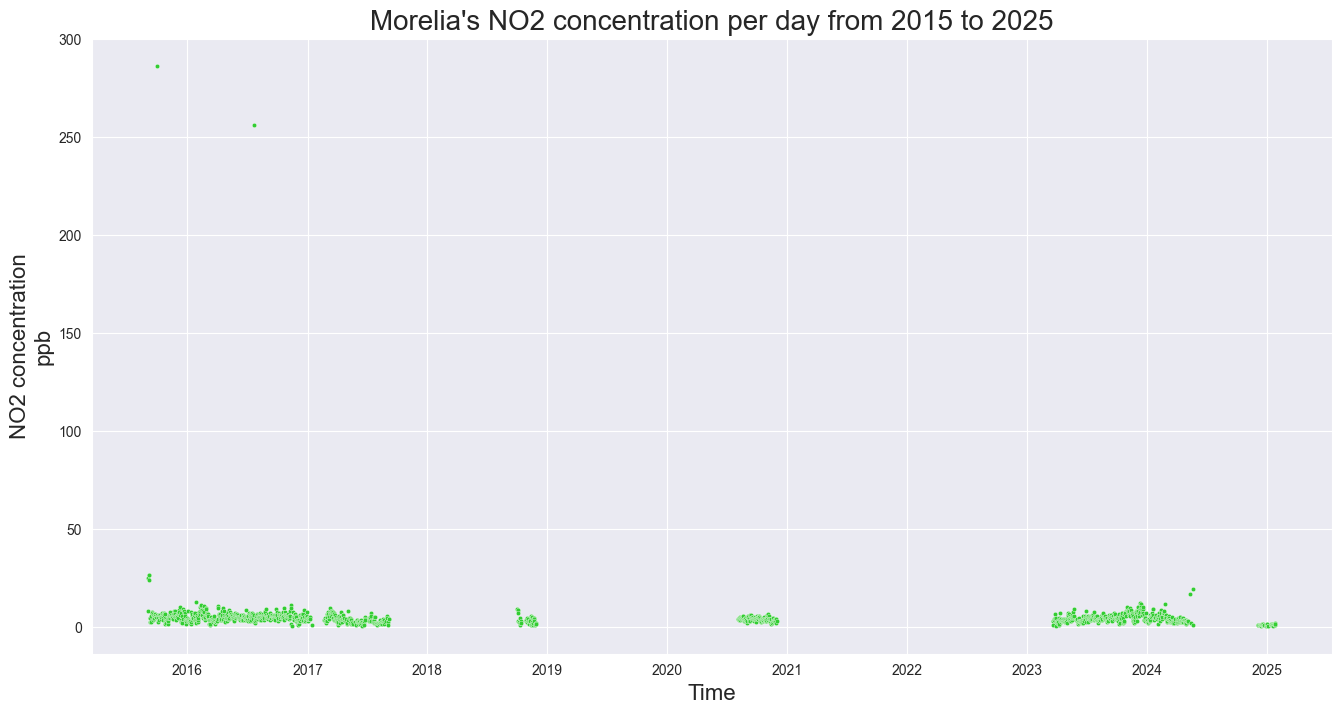

In [16]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["NO2"], s=10, color="limegreen")
# plt.ylim(0, 10)
plt.ylabel("NO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO2 concentration per day from 2015 to 2025", size=20)
plt.show()